In [1]:
import pandas as pd
df=pd.read_csv("d:/data/zoo/zoo.csv") #데이터셋 로딩
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
1,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
2,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
3,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
4,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2


In [2]:
train_cols=df.columns[1:17] #1~16 인덱스
X=df[train_cols] # 독립변수
y=df["class_type"] # 종속변수

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#데이터셋을 8:2로 구분
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              random_state=1)
#트리 모형 생성
model=DecisionTreeClassifier(random_state=0)
#모형 훈련
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [4]:
#예측 정확도 확인
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
1.0


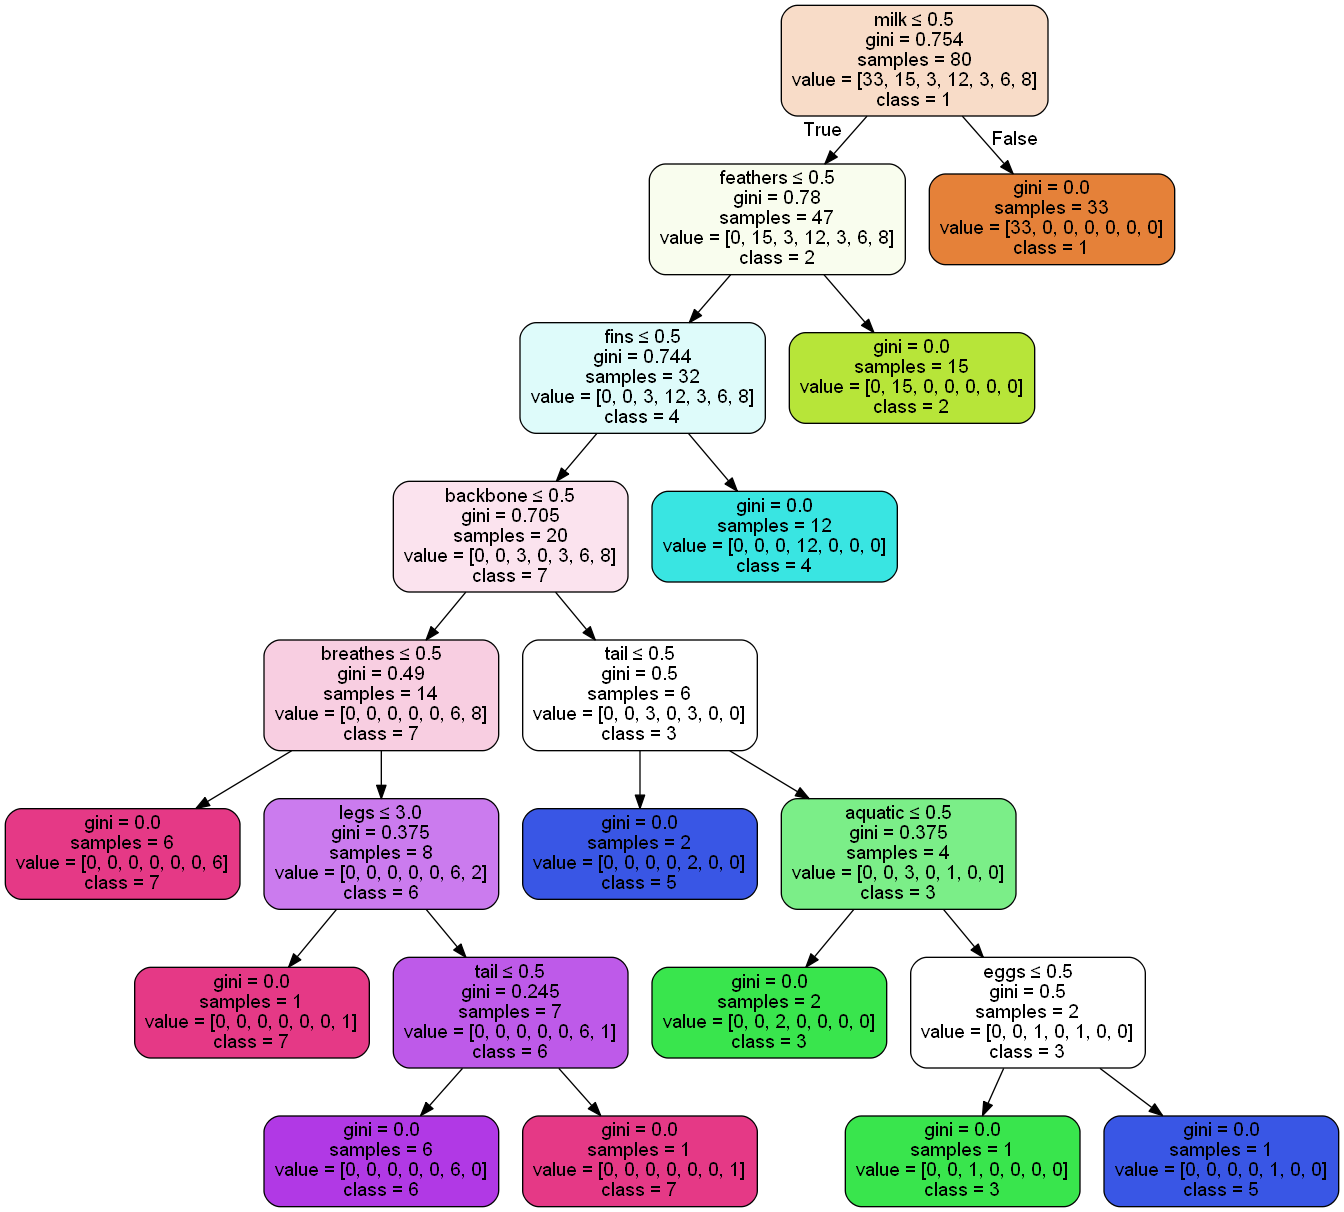

In [5]:
from sklearn.tree import export_graphviz
import pydotplus 
import graphviz
from IPython.display import Image

dot_data=export_graphviz(model,out_file=None,
    feature_names=train_cols, class_names=["1","2","3","4","5","6","7"],
    filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)    
Image(graph.create_png())

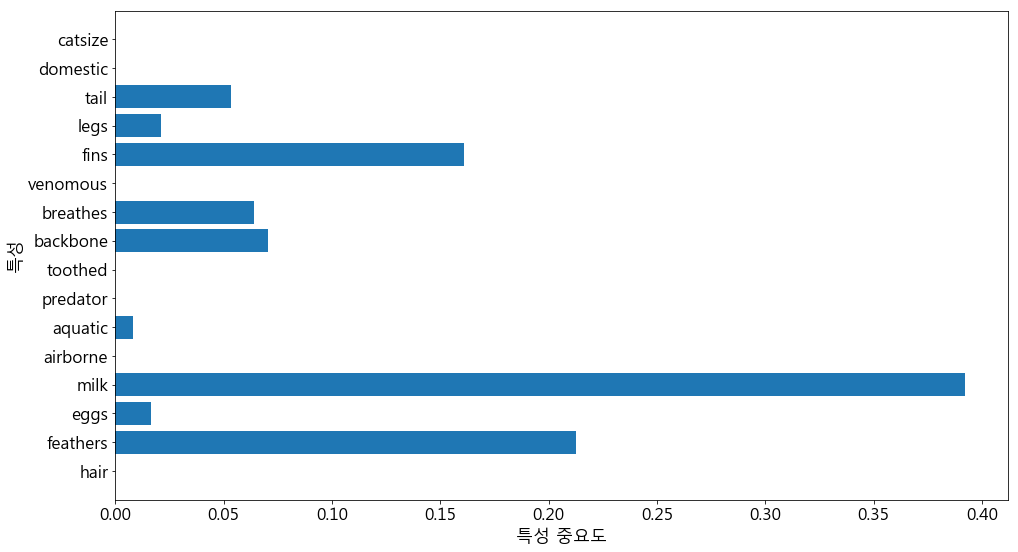

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(
    fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)

def plot_tree(model):
    n_features=X.shape[1] #독립변수의 갯수
    plt.rcParams["figure.figsize"]=(16,9) #그래프의 가로,세로 인치
    plt.rcParams["font.size"]=17 #그래프의 폰트 사이즈
    plt.barh(range(n_features),model.feature_importances_,
             align="center")
    plt.yticks(np.arange(n_features),train_cols) 
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    
plot_tree(model)     #특성 중요도 그래프 출력